In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [3]:
# Get the data from the .csv file
df = pd.read_csv('kmeans_data.csv',
    usecols=['Feature 1', 'Feature 2', 'Class'])


In [4]:
df["Class"] = pd.Categorical(df["Class"])

In [5]:
df["Class"] = df["Class"].cat.codes

In [6]:
# Change dataframe to numpy matrix
data = df.values[:, 0:2]
category = df.values[:, 2]

In [7]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

In [8]:
# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean


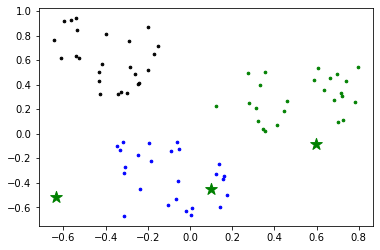

In [9]:
# Plot the data and the centers generated as random
colors=['green', 'blue', 'black']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)


In [10]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
label= kmeans.fit(df)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,Feature 1,Feature 2,Class,cluster_id
0,-0.646,0.763,2,1
1,-0.610,0.617,2,1
2,-0.596,0.915,2,1
3,-0.565,0.927,2,1
4,-0.542,0.631,2,1


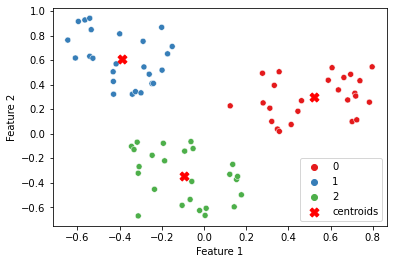

In [13]:
# Plotting the clusters with 'child_mort' and 'income'

sns.scatterplot(x = 'Feature 1', y = 'Feature 2', hue = 'cluster_id', data = df, palette = 'Set1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

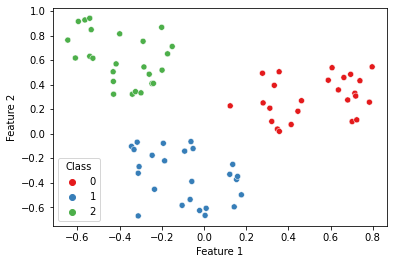

In [14]:
# Plotting the clusters with 'child_mort' and 'income'

sns.scatterplot(x = 'Feature 1', y = 'Feature 2', hue = 'Class', data = df, palette = 'Set1')

In [15]:
kmeans.cluster_centers_

array([[ 0.5232 ,  0.29572,  0.     ],
       [-0.38716,  0.60956,  2.     ],
       [-0.0934 , -0.34484,  1.     ]])

In [16]:
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 25, 2: 25, 0: 25})

## silhouette analysis

In [17]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6653738214308194
For n_clusters=3, the silhouette score is 0.8271149170031641
For n_clusters=4, the silhouette score is 0.7195408157764611
For n_clusters=5, the silhouette score is 0.5964152779607821
For n_clusters=6, the silhouette score is 0.48217889031509403
For n_clusters=7, the silhouette score is 0.47865146627820837
For n_clusters=8, the silhouette score is 0.48489405753127035
